Hi guys, let's see how fucked up this country is.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.ticker as mticker
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Indonesian Salary by Region (1997-2022).csv')

In [3]:
df.head()

,REGION,SALARY,YEAR
0,ACEH,128000,1997
1,SUMATERA UTARA,151000,1997
2,SUMATERA BARAT,119000,1997
3,RIAU,151500,1997
4,JAMBI,119500,1997


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   REGION  870 non-null    object
 1   SALARY  870 non-null    int64 
 2   YEAR    870 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.5+ KB


In [5]:
df.isna().sum()

REGION    0
SALARY    0
YEAR      0
dtype: int64

In [6]:
df.duplicated().sum()

0

good, everything was clear except the government issues.

In [7]:
print(len(df['REGION'].unique()))

35


In [11]:
df[df['REGION'] == 'INDONESIA']

,REGION,SALARY,YEAR
27,INDONESIA,135000,1997
59,INDONESIA,150900,1998
91,INDONESIA,175400,1999
123,INDONESIA,216500,2000
155,INDONESIA,290500,2001
187,INDONESIA,362700,2002
219,INDONESIA,414700,2003
251,INDONESIA,458500,2004
283,INDONESIA,507697,2005
317,INDONESIA,602702,2006


we all know that indonesia is a country

In [12]:
df = df[df['REGION'] != 'INDONESIA']

let's see what's the most and the fewest salary of all regions

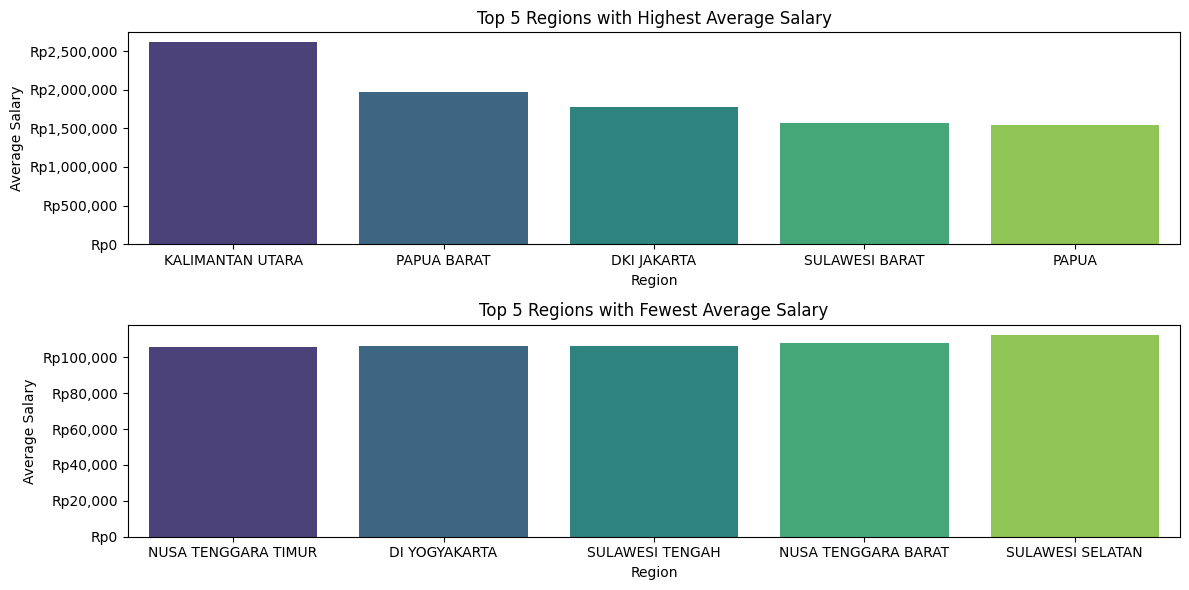

In [24]:
top_5_region_salary = df.groupby('REGION', as_index=False)['SALARY'].mean()
top_5_region_salary = top_5_region_salary.nlargest(5, 'SALARY')
bottom_5_salary = df.groupby('REGION', as_index=False)['SALARY'].mean()
bottom_5_salary = df.nsmallest(5, 'SALARY')

fig, ax = plt.subplots(2,1, figsize=(12, 6))
sns.barplot(x='REGION', y='SALARY', data=top_5_region_salary, ax=ax[0], palette='viridis')
ax[0].set_title('Top 5 Regions with Highest Average Salary')
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Average Salary') 
ax[0].yaxis.set_major_formatter(mticker.StrMethodFormatter('Rp{x:,.0f}'))

sns.barplot(x='REGION', y='SALARY', data=bottom_5_salary, ax=ax[1], palette='viridis')
ax[1].set_title('Top 5 Regions with Fewest Average Salary')
ax[1].set_xlabel('Region')
ax[1].set_ylabel('Average Salary') 
ax[1].yaxis.set_major_formatter(mticker.StrMethodFormatter('Rp{x:,.0f}'))

plt.tight_layout()
plt.show()

wtf is 2,5 mio average over 20 years

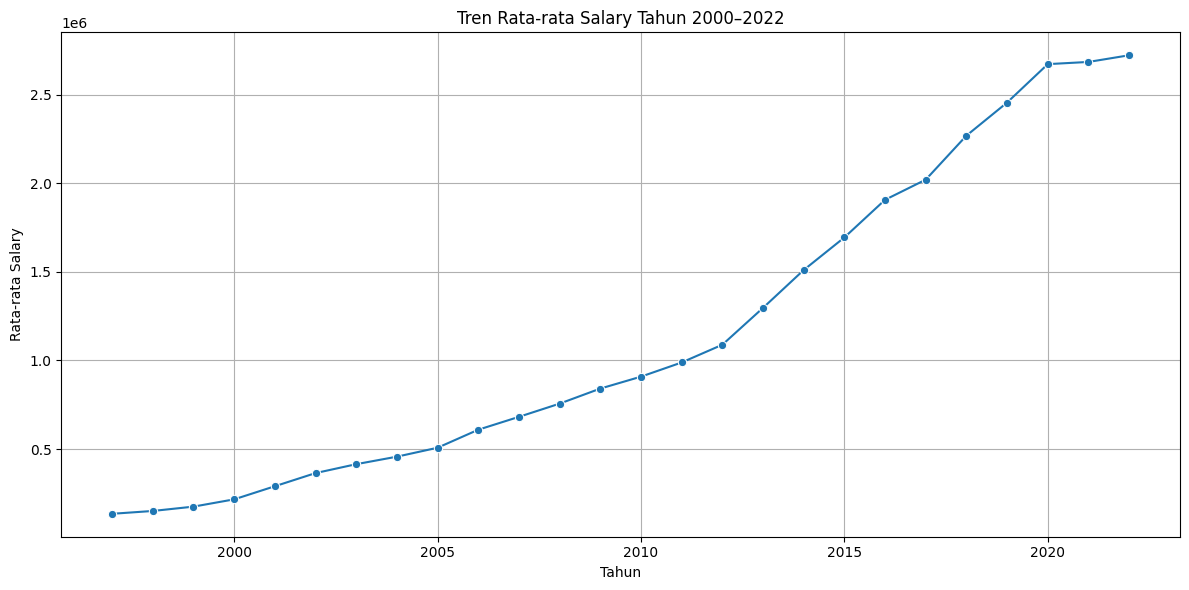

In [25]:
avg_salary_per_year = df.groupby('YEAR', as_index=False)['SALARY'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_salary_per_year, x='YEAR', y='SALARY', marker='o')
plt.title('Tren Rata-rata Salary Tahun 2000–2022')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

alr :)

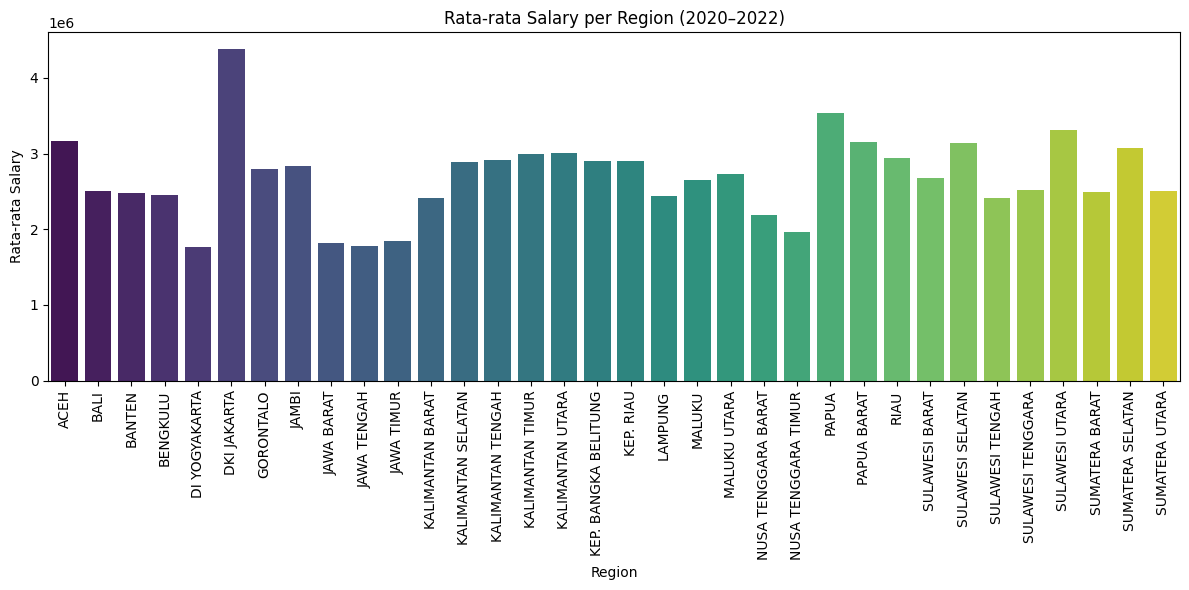

In [28]:
year_filtered = df[df['YEAR'] >= 2020]
year_filtered = year_filtered.groupby('REGION', as_index=False)['SALARY'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(data=year_filtered, x='REGION', y='SALARY', palette='viridis')
plt.title('Rata-rata Salary per Region (2020–2022)')   
plt.xlabel('Region')
plt.ylabel('Rata-rata Salary')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

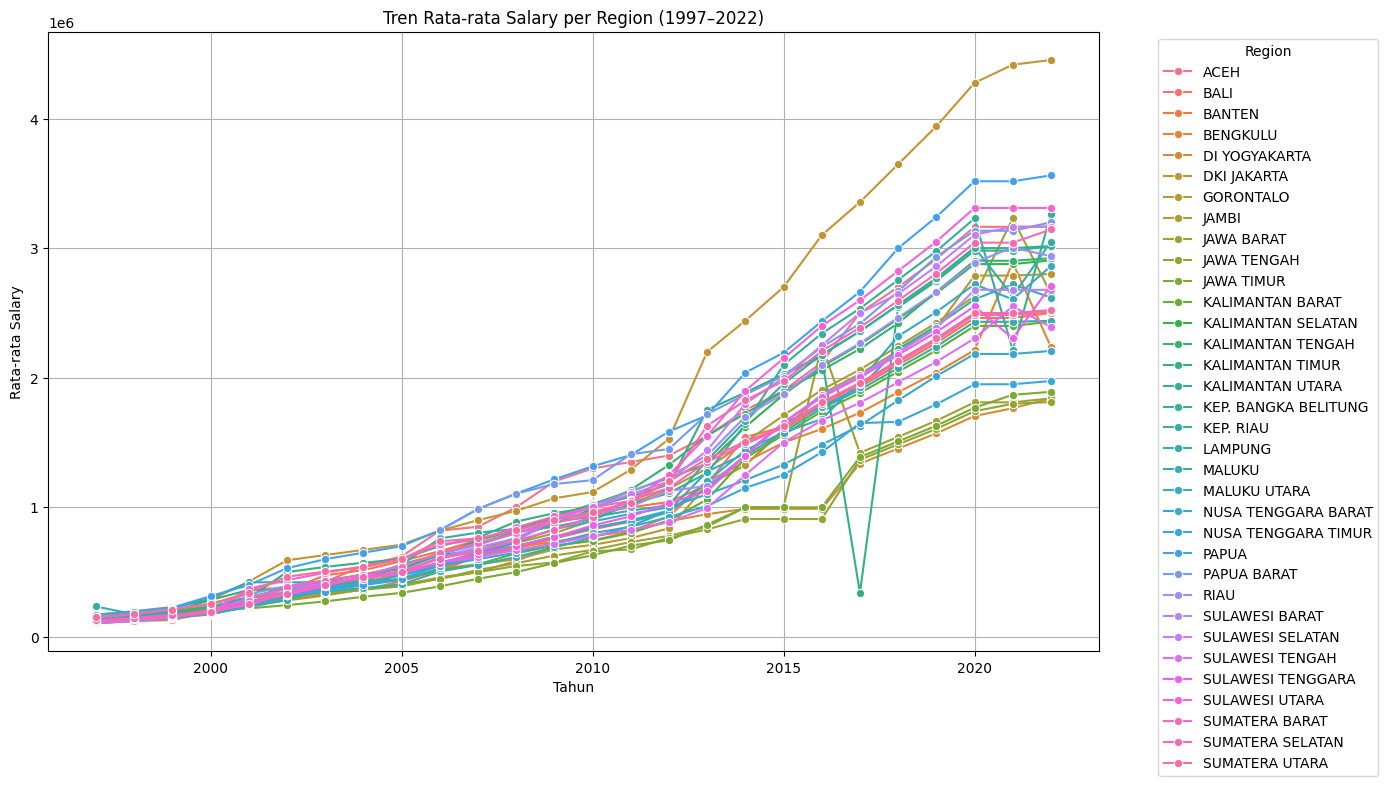

In [29]:
region_year = df.groupby(['REGION', 'YEAR'], as_index=False)['SALARY'].mean()
plt.figure(figsize=(14, 8))
sns.lineplot(data=region_year, x='YEAR', y='SALARY', hue='REGION', marker='o')
plt.title('Tren Rata-rata Salary per Region (1997–2022)')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Salary')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

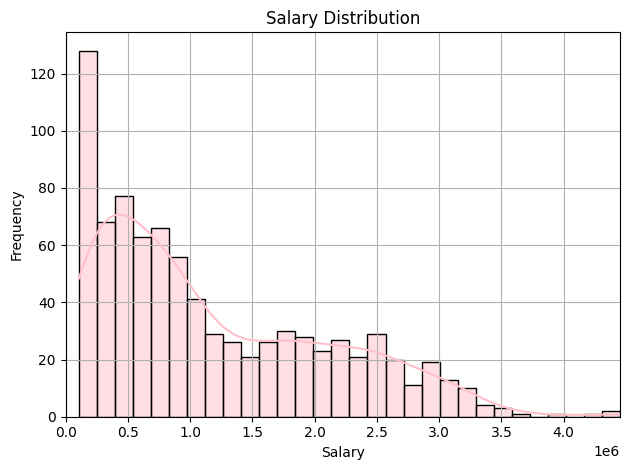

In [32]:
sns.histplot(data=df, x='SALARY', bins=30, kde=True, color='pink')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.xlim(0, df['SALARY'].max())
plt.grid(True)
plt.tight_layout()
plt.show()